<p><img alt="Colaboratory logo" height="93px" src="https://image.flaticon.com/icons/png/512/1998/1998557.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Projeto DIO - Análise de dados com Python e Pandas</h1><br>
<h3><b>Análise dos Docentes da Rede Estadual de Ensino do Estado de São Paulo</b></h3>
<h5><b>Desenvolvido por Flavio Tokuo</b></h5>

Para este estudo foi utilizada a base de dados de docentes por categoria funcional, referente ao contingente da Rede Estadual de Ensino do Estado de São Paulo de dezembro de 2017, disponibilizada no site <a href="https://dados.educacao.sp.gov.br/">Dados Abertos da Educação</a>. 

<b>Endereços de Acesso:</b>
- https://dados.educacao.sp.gov.br/
- https://dados.educacao.sp.gov.br/dataset/quantidade-de-docentes-por-categoria-funcional

<b>Arquivo</b>: 3.1-Total_Docentes_Cargo Exercício x Categoria_1217n.csv


<hr size="3" width="100%" color="gray">
<hr size="1" width="100%" color="gray">
<hr size="3" width="100%" color="gray">  
<h3><b>Etapa Inicial - Carregamento de Bibliotecas e Arquivo CSV.</b></h3>

In [200]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy

In [201]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

Saving 3.1-Total_Docentes_Cargo Exercício x Categoria_1217n.csv to 3.1-Total_Docentes_Cargo Exercício x Categoria_1217n (3).csv


In [202]:
df = pd.read_csv("3.1-Total_Docentes_Cargo Exercício x Categoria_1217n.csv", 
                 sep=",", 
                 header=None,
                 encoding='cp1250',
                 decimal=",",
                 skiprows=1) #error_bad_lines=False,

In [203]:
# df.head(10)

<h3><b>Ajustes, Limpeza e Transformações</b></h3>

In [204]:
# Subustituição de caractere "ponto" para não distorcer valor dos campos na conversão para numérico
df[6] = df[6].str.replace('.','')
df[8] = df[8].str.replace('.','')
df[12] = df[12].str.replace('.','')
df[16] = df[16].str.replace('.','')
df[18] = df[18].str.replace('.','')
df[22] = df[22].str.replace('.','')

In [205]:
# df.shape
# df.head()
# df.dtypes

In [206]:
# Limpeza e Ajustes adicionais do Dataframe
df.drop(df.columns[[23, 24, 25]], axis = 1, inplace = True)
df.replace(to_replace =" -   ", value ="0", inplace=True)
df.fillna(0, inplace=True)

In [207]:
df[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]] = \
df[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].apply(pd.to_numeric)

In [208]:
# df.dtypes
# df.head()

In [209]:
# Aplicando nomes às colunas do Dataframe
df = df.rename(columns=
     { 0 : "REGIAO",
       1 : "DIRETORIA_ENSINO",
       2 : "PEBI_6407_EFET",
       3 : "PEBI_6407_CAT_F",
       4 : "PEBI_6407_ESTVL",
       5 : "PEBI_6407_CAT_L",
       6 : "PEBI_6407_TOT_PER",
       7 : "PEBI_6407_TOT_TMP",
       8 : "PEBI_6407_TOTAL",
       9 : "PEBI_6407_AULA_CAT_F",
      10 : "PEBI_6407_AULA_TMP",
      11 : "PEBI_6407_AULA_TOTAL",
      12 : "PEBII_6409_EFET",
      13 : "PEBII_6409_CAT_F",
      14 : "PEBII_6409_EST",
      15 : "PEBII_6409_CLT",
      16 : "PEBII_6409_TOT_PER",
      17 : "PEBII_6409_TOT_TMP",
      18 : "PEBII_6409_TOTAL",
      19 : "PROFII_6408_CAT_F",
      20 : "PROFII_6408_ESTVL",
      21 : "PROFII_6408_TOTAL",
      22 : "TOTAL_DOC"})

In [210]:
# Exclusão de linhas sem informação
df = df.loc[df.REGIAO != 0]

In [211]:
# df.head()

In [212]:
df.shape
# df.head(15)
# df.dtypes

(99, 23)

In [213]:
# Criação de Campo ZONA_CAPITAL para agrupar Cidades em Regiões da Capital de São Paulo
df['ZONA_CAPITAL'] = 'FORA DA CAPITAL'
df.loc[df['DIRETORIA_ENSINO'].str.strip().isin(['D.E.REG. CENTRO', 
                                                'D.E.REG. CENTRO OESTE',
                                                'D.E.REG. CENTRO SUL']), 'ZONA_CAPITAL'] = 'CENTRO'
df.loc[df['DIRETORIA_ENSINO'].str.strip().isin(['D.E.REG. LESTE 1', 
                                                'D.E.REG. LESTE 2',
                                                'D.E.REG. LESTE 3',
                                                'D.E.REG. LESTE 4',
                                                'D.E.REG. LESTE 5']), 'ZONA_CAPITAL'] = 'LESTE'
df.loc[df['DIRETORIA_ENSINO'].str.strip().isin(['D.E.REG. NORTE 1', 
                                                'D.E.REG. NORTE 2']), 'ZONA_CAPITAL'] = 'NORTE'
df.loc[df['DIRETORIA_ENSINO'].str.strip().isin(['D.E.REG. SUL 1', 
                                                'D.E.REG. SUL 2',
                                                'D.E.REG. SUL 3']), 'ZONA_CAPITAL'] = 'SUL'

In [214]:
# Criação de Campos de Cargos não Efetivos
df['PEBI_6407_NAO_EFET'] = df["PEBI_6407_CAT_F"] + df["PEBI_6407_ESTVL"] + df["PEBI_6407_CAT_L"]
df['PEBII_6409_NAO_EFET'] = df["PEBII_6409_CAT_F"] + df["PEBII_6409_EST"] + df["PEBII_6409_CLT"]

<h3><b>Análises Diversas sobre a base de Contingente Funcional da Rede Estadual de Ensino de São Paulo</b></h3>

In [215]:
# Verificando o número Total de Docentes (Validação de Limpezas, Ajustes e Transformações)
df[["PEBI_6407_TOTAL", "PEBI_6407_AULA_TOTAL", 
    "PEBII_6409_TOTAL", "PROFII_6408_TOTAL", "TOTAL_DOC"]].sum()

PEBI_6407_TOTAL          32295
PEBI_6407_AULA_TOTAL      9692
PEBII_6409_TOTAL        153243
PROFII_6408_TOTAL           22
TOTAL_DOC               195252
dtype: int64

In [216]:
# Maior quantidade de docentes em uma Região
df["TOTAL_DOC"].max()

5110

In [217]:
# Menor quantidade de docentes em uma Região
df["TOTAL_DOC"].min()

1

In [218]:
# Quantidade de Docentes da Rede Estadual de Ensino Distribuídos em todo o Estado de São Paulo
df_doc_estado = df.groupby(["REGIAO"]) \
      [["PEBI_6407_TOTAL", "PEBI_6407_AULA_TOTAL", "PEBII_6409_TOTAL", "PROFII_6408_TOTAL", "TOTAL_DOC"]].sum().reset_index()
df_doc_estado.head()

,REGIAO,PEBI_6407_TOTAL,PEBI_6407_AULA_TOTAL,PEBII_6409_TOTAL,PROFII_6408_TOTAL,TOTAL_DOC
0,CAPITAL,14055,1613,35783,5,51456
1,GDE_SP,6226,2138,37260,4,45628
2,INTERIOR,12006,5941,80115,13,98075
3,O_CENTRAL,8,0,85,0,93


In [219]:
# Quantidade de Docentes Efetivos, Não Efetivos e Temporários da Rede Estadual de Ensino no Estado de SP (Desconsiderado Órgãos Centrais)
df_doc_categ_estado = df.loc[df.REGIAO.str.strip() != "O_CENTRAL"] \
      .groupby(["REGIAO"]) \
      [["PEBI_6407_EFET", "PEBI_6407_NAO_EFET", "PEBI_6407_TOT_TMP", "PEBI_6407_AULA_TOTAL", 
        "PEBII_6409_EFET", "PEBII_6409_NAO_EFET", "PEBII_6409_TOT_TMP", "PROFII_6408_TOTAL", "TOTAL_DOC"]].sum().reset_index()

df_doc_categ_estado = df_doc_categ_estado.rename(columns=
     {      "PEBI_6407_EFET" : "PEBI_6407_EFETIVO",
        "PEBI_6407_NAO_EFET" : "PEBI_6407_NAO_EFETIVO",
         "PEBI_6407_TOT_TMP" : "PEBI_6407_TEMPORARIO",
      "PEBI_6407_AULA_TOTAL" : "PEBI_6407_AULA",
           "PEBII_6409_EFET" : "PEBII_6409_EFETIVO",
       "PEBII_6409_NAO_EFET" : "PEBII_6409_NAO_EFETIVO",
        "PEBII_6409_TOT_TMP" : "PEBII_6409_TEMPORARIO",
         "PROFII_6408_TOTAL" : "PROFII_6408",
                 "TOTAL_DOC" : "TOTAL_DOCENTES"
     })
df_doc_categ_estado.head(15)

,REGIAO,PEBI_6407_EFETIVO,PEBI_6407_NAO_EFETIVO,PEBI_6407_TEMPORARIO,PEBI_6407_AULA,PEBII_6409_EFETIVO,PEBII_6409_NAO_EFETIVO,PEBII_6409_TEMPORARIO,PROFII_6408,TOTAL_DOCENTES
0,CAPITAL,6749,4102,3204,1613,26220,7005,2558,5,51456
1,GDE_SP,3350,1741,1135,2138,27158,7867,2235,4,45628
2,INTERIOR,6522,2754,2730,5941,57101,15575,7439,13,98075


In [220]:
# Quantidade de Docentes da Rede Estadual de Ensino por Regiões da Capital de São Paulo
df_doc_reg_capital = df.loc[df.ZONA_CAPITAL != "FORA DA CAPITAL"] \
      .groupby(["ZONA_CAPITAL"]) \
      [["PEBI_6407_TOTAL", "PEBI_6407_AULA_TOTAL", "PEBII_6409_TOTAL", "PROFII_6408_TOTAL", "TOTAL_DOC"]].sum().reset_index()
df_doc_reg_capital.head()

,ZONA_CAPITAL,PEBI_6407_TOTAL,PEBI_6407_AULA_TOTAL,PEBII_6409_TOTAL,PROFII_6408_TOTAL,TOTAL_DOC
0,CENTRO,2350,287,5912,1,8550
1,LESTE,5333,471,14320,3,20127
2,NORTE,2198,312,5521,1,8032
3,SUL,4174,543,10030,0,14747


<h3><b>Apresentação gráfica das Análises Efetuadas</b></h3>

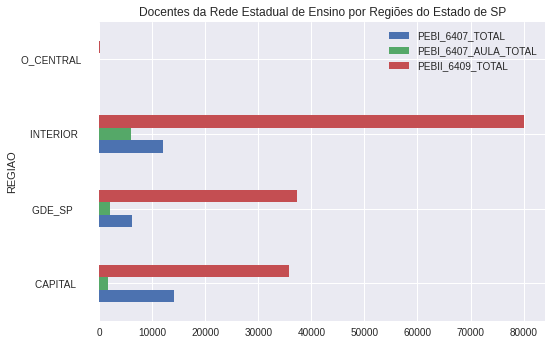

In [221]:
# Docentes da Rede Estadual de Ensino por Regiões do Estado de SP
df_doc_estado.plot.barh(x="REGIAO", y=["PEBI_6407_TOTAL", "PEBI_6407_AULA_TOTAL", "PEBII_6409_TOTAL"], 
                        title="Docentes da Rede Estadual de Ensino por Regiões do Estado de SP");

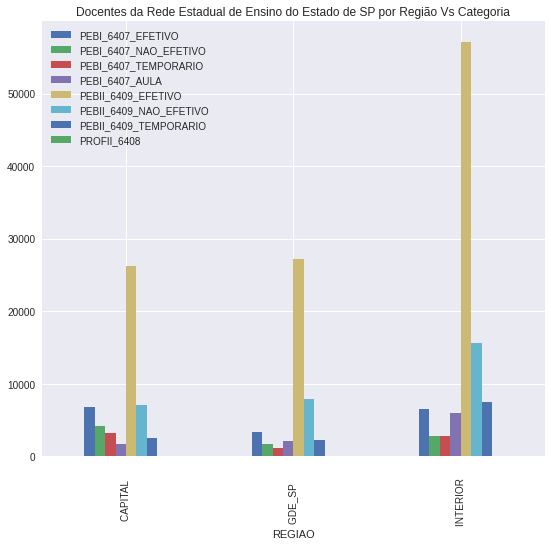

In [222]:
# Docentes da Rede Estadual de Ensino do Estado de SP por Região Vs Categoria
df_doc_categ_estado.plot(x="REGIAO", 
                   y=["PEBI_6407_EFETIVO",
                      "PEBI_6407_NAO_EFETIVO",
                      "PEBI_6407_TEMPORARIO",
                      "PEBI_6407_AULA",
                      "PEBII_6409_EFETIVO",
                      "PEBII_6409_NAO_EFETIVO",
                      "PEBII_6409_TEMPORARIO",
                      "PROFII_6408"], 
                   kind="bar", figsize=(9,8), title="Docentes da Rede Estadual de Ensino do Estado de SP por Região Vs Categoria")
plt.show()

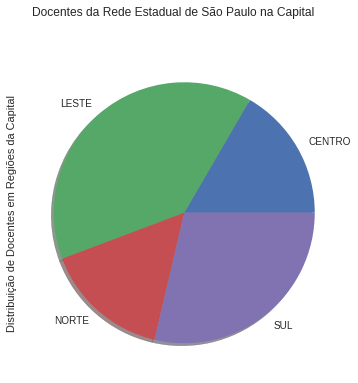

In [223]:
# Docentes da Rede Estadual de São Paulo na Capital
df_graf1 = df_doc_reg_capital.groupby(df_doc_reg_capital["ZONA_CAPITAL"])["TOTAL_DOC"].sum() #.plot.pie()

df_graf1.plot(kind='pie', subplots=True, figsize=(12,6), shadow = True, 
              ylabel='Distribuição de Docentes em Regiões da Capital', 
              title="Docentes da Rede Estadual de São Paulo na Capital")

plt.show()

<hr size="3" width="100%" color="gray">
<hr size="1" width="100%" color="gray">
<hr size="3" width="100%" color="gray"><br>

<h3><b>Outras Referências e Descrição dos Campos da Base CSV</b></h3>

<b>Referências Adicionais:</b>

- https://www.educacao.sp.gov.br/a2sitebox/arquivos/documentos/874.pdf
- https://www.educacao.sp.gov.br/conheca-a-descricao-das-siglas-mais-usadas-pelo-departamento-de-rh-da-educacao/
- https://www.pebsp.com/categorias-de-professores-no-estado-de-sao-paulo/


<b>Descrição dos Campos da base CSV</b>
<table>
   <tr>
     <th>Campo</th>
     <th>Descrição</th>
   </tr>
   <tr>
     <td>REGIAO</td>
     <td>REGIÕES DO ESTADO DE SÃO PAULO</td>
   </tr>
   <tr>
     <td>DIRETORIA_ENSINO</td>
     <td>DIRETORIAS DA SECRETARIA DA EDUCAÇÃO DE SÃO PAULO</td>
   </tr>   
   <tr>
     <td>PEBI_6407_EFET</td>
     <td>6407 - PROF. EDUC. BÁSICA I - CLASSE QUADRO PERMANENTE - EFETIVO</td>
   </tr>
   <tr>
     <td>PEBI_6407_CAT_F</td>
     <td>6407 - PROF. EDUC. BÁSICA I - CLASSE QUADRO PERMANENTE - CATEG. "F"</td>
   </tr>
   <tr>
     <td>PEBI_6407_ESTVL</td>
     <td>6407 - PROF. EDUC. BÁSICA I - CLASSE QUADRO PERMANENTE - ESTÁVEL</td>
   </tr>
   <tr>
     <td>PEBI_6407_CAT_L</td>
     <td>6407 - PROF. EDUC. BÁSICA I - CLASSE QUADRO PERMANENTE - CATEG  "L"</td>
   </tr>
   <tr>
     <td>PEBI_6407_TOT_PER</td>
     <td>6407 - PROF. EDUC. BÁSICA I - 1-TOTAL  PERMANENTE</td>
   </tr>
   <tr>
     <td>PEBI_6407_TOT_TMP</td>
     <td>6407 - PROF. EDUC. BÁSICA I - 2- TOTAL TEMPORÁRIO</td>
   </tr>
   <tr>
     <td>PEBI_6407_TOTAL</td>
     <td>6407 - PROF. EDUC. BÁSICA I - TOTAL PEB-I CLASSE</td>
   </tr>
   <tr>
     <td>PEBI_6407_AULA_CAT_F</td>
     <td>6407 - PROF. EDUC.  BÁSICA I - AULA - 1-TOTAL  PERMANENTE (CATEG. F)</td>
   </tr>
   <tr>
     <td>PEBI_6407_AULA_TMP</td>
     <td>6407 - PROF. EDUC.  BÁSICA I - AULA - 2- TOTAL TEMPORÁRIO</td>
   </tr>
   <tr>
     <td>PEBI_6407_AULA_TOTAL</td>
     <td>6407 - PROF. EDUC.  BÁSICA I - AULA - TOTAL PEB-I AULA</td>
   </tr>
   <tr>
     <td>PEBII_6409_EFET</td>
     <td>6409 - PROF. EDUC. BÁSICA II - QUADRO PERMANENTE - EFETIVO</td>
   </tr>
   <tr>
     <td>PEBII_6409_CAT_F</td>
     <td>6409 - PROF. EDUC. BÁSICA II - QUADRO PERMANENTE - CATEG. "F"</td>
   </tr>
   <tr>
     <td>PEBII_6409_EST</td>
     <td>6409 - PROF. EDUC. BÁSICA II - QUADRO PERMANENTE - ESTÁVEL</td>
   </tr>
   <tr>
     <td>PEBII_6409_CLT</td>
     <td>6409 - PROF. EDUC. BÁSICA II - QUADRO PERMANENTE - C.L.T.</td>
   </tr>
   <tr>
     <td>PEBII_6409_TOT_PER</td>
     <td>6409 - PROF. EDUC. BÁSICA II - 1-TOTAL  PERMANENTE</td>
   </tr>
   <tr>
     <td>PEBII_6409_TOT_TMP</td>
     <td>6409 - PROF. EDUC. BÁSICA II - 2- TOTAL TEMPORÁRIO</td>
   </tr>
   <tr>
     <td>PEBII_6409_TOTAL</td>
     <td>6409 - PROF. EDUC. BÁSICA II - TOTAL PEB -II</td>
   </tr>
   <tr>
     <td>PROFII_6408_CAT_F</td>
     <td>6408 - PROFESSOR II -  QUADRO PERMANENTE - CATEG 'F'</td>
   </tr>
   <tr>
     <td>PROFII_6408_ESTVL</td>
     <td>6408 - PROFESSOR II -  QUADRO PERMANENTE - ESTÁVEL</td>
   </tr>
   <tr>
     <td>PROFII_6408_TOTAL</td>
     <td>6408 - PROFESSOR II - TOTAL PROF. II</td>
   </tr>
   <tr>
     <td>TOTAL_DOC</td>
     <td>TOTAL DOCENTES</td>
   </tr>
</table>